In [202]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,accuracy_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [221]:
df = pd.read_csv(r"C:\Users\PC\Desktop\pip\laptops.csv")

In [155]:
df.shape

(1000, 11)

In [223]:
df.columns = df.columns.str.lower()

In [224]:
df.head()

,companyname,typeoflaptop,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [225]:
df.duplicated().sum()

0

In [226]:
df.isnull().sum()

companyname         0
typeoflaptop        0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price               0
dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   companyname       1000 non-null   object 
 1   typeoflaptop      1000 non-null   object 
 2   inches            1000 non-null   float64
 3   screenresolution  1000 non-null   object 
 4   cpu               1000 non-null   object 
 5   ram               1000 non-null   object 
 6   memory            1000 non-null   object 
 7   gpu               1000 non-null   object 
 8   opsys             1000 non-null   object 
 9   weight            1000 non-null   float64
 10  price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [228]:
df.describe()

,inches,weight,price
count,1000.000000,1000.000000,1000.000000
mean,14.496646,3.469800,51602.255339
std,2.066624,0.857112,13802.833231
min,11.005842,2.000819,30060.275100
25%,12.677791,2.720228,40376.617670
50%,14.509298,3.477824,50683.971717
75%,16.313026,4.189891,61897.280126
max,17.998786,4.994556,115137.368077


In [229]:
df.inches.describe()

count    1000.000000
mean       14.496646
std         2.066624
min        11.005842
25%        12.677791
50%        14.509298
75%        16.313026
max        17.998786
Name: inches, dtype: float64

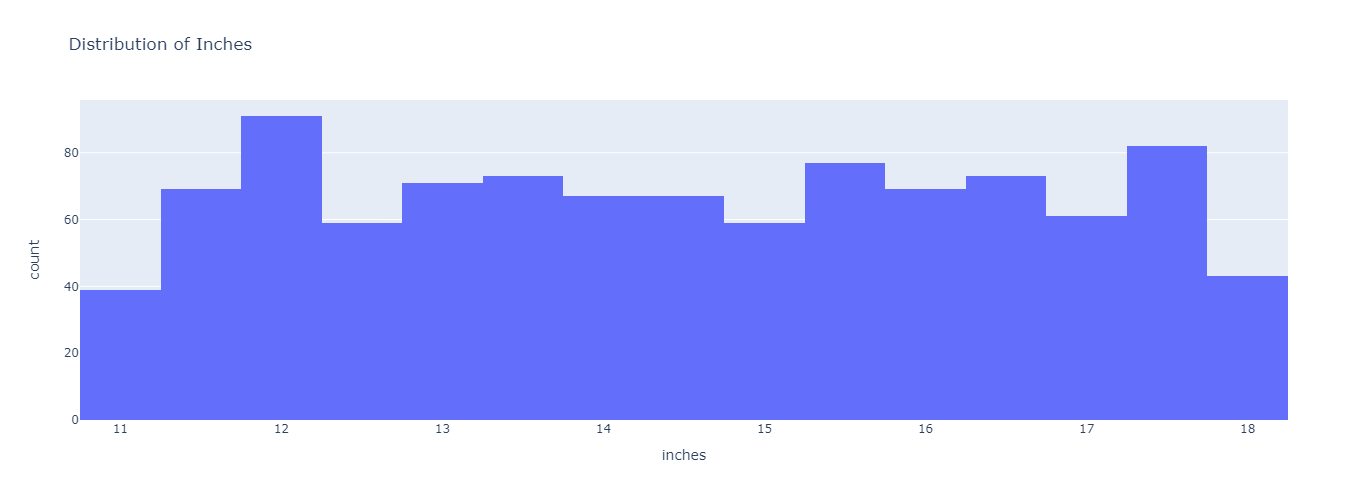

In [230]:
## Distribution AAnalysis 
inches_fig = px.histogram(df, x=df.inches,title='Distribution of Inches',width=700,height=500)
inches_fig

In [231]:
df.weight.describe()

count    1000.000000
mean        3.469800
std         0.857112
min         2.000819
25%         2.720228
50%         3.477824
75%         4.189891
max         4.994556
Name: weight, dtype: float64

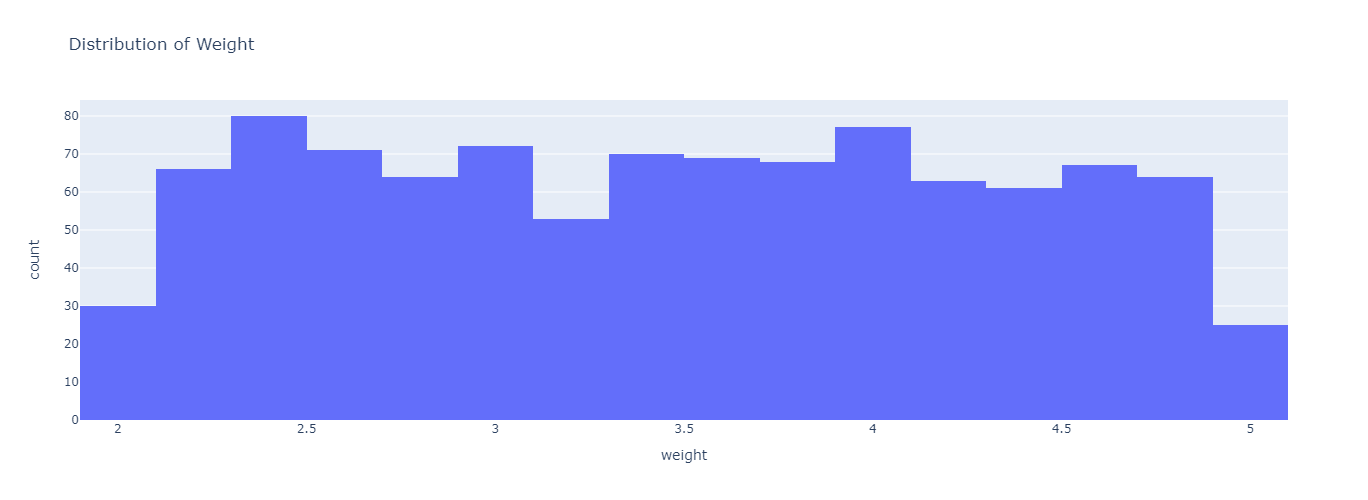

In [232]:
weight_fig = px.histogram(df, x=df.weight,title='Distribution of Weight',width=700,height=500)
weight_fig

In [233]:
df.price.describe()

count      1000.000000
mean      51602.255339
std       13802.833231
min       30060.275100
25%       40376.617670
50%       50683.971717
75%       61897.280126
max      115137.368077
Name: price, dtype: float64

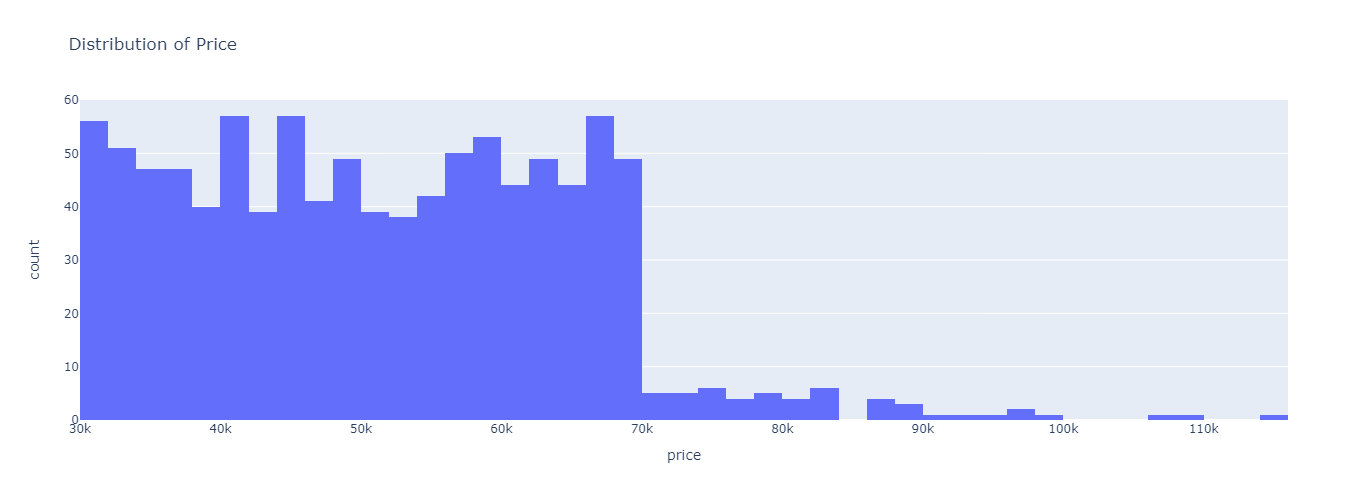

In [234]:
price_fig = px.histogram(df, x=df.price,title='Distribution of Price',width=700,height=500)
price_fig

In [235]:
df.columns

Index(['companyname', 'typeoflaptop', 'inches', 'screenresolution', 'cpu',
       'ram', 'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

In [236]:
## Categorical Analysis
df.companyname.value_counts()

companyname
MSI          128
Microsoft    118
Apple        113
lenevo       113
Asus         112
Chuwi        109
Acer         107
Dell         101
hp            99
Name: count, dtype: int64

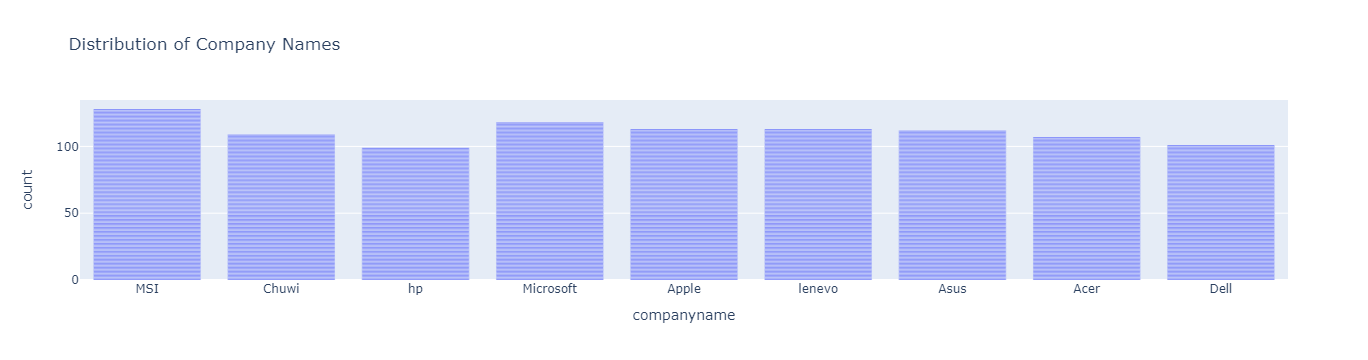

In [237]:
companyname_fig = px.bar(df,x=df.companyname,title='Distribution of Company Names')
companyname_fig

In [238]:
df.typeoflaptop.value_counts()

typeoflaptop
Business Laptop       176
WorkStation           175
Gaming                168
UltraBook             166
2 in 1 Convertible    162
NoteBook              153
Name: count, dtype: int64

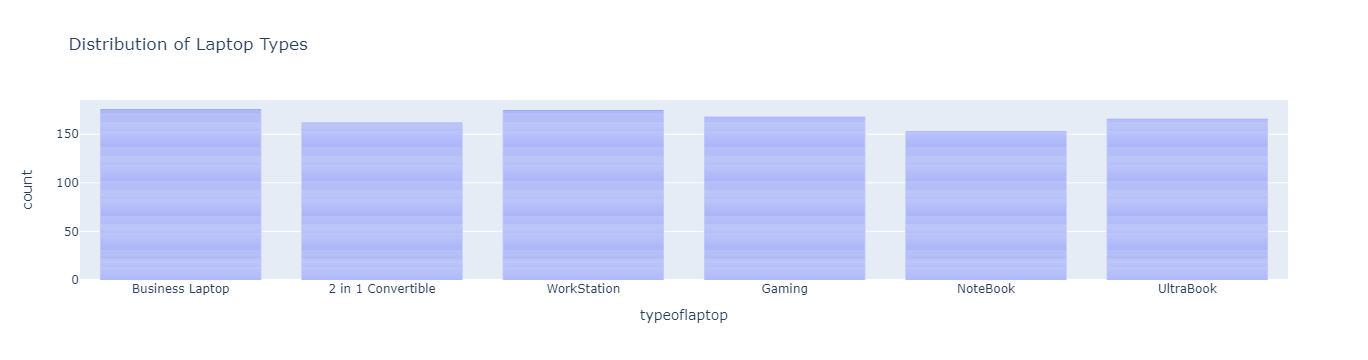

In [239]:
type_fig = px.bar(df,x=df.typeoflaptop,title='Distribution of Laptop Types')
type_fig

In [240]:
df.screenresolution.value_counts()

screenresolution
2K                                           181
4K                                           179
IPS Panel Full HD / Touchscreen 1920x1080    176
Full HD                                      162
HD 1920x1080                                 160
IPS Panel Retina Display 2560x1600           142
Name: count, dtype: int64

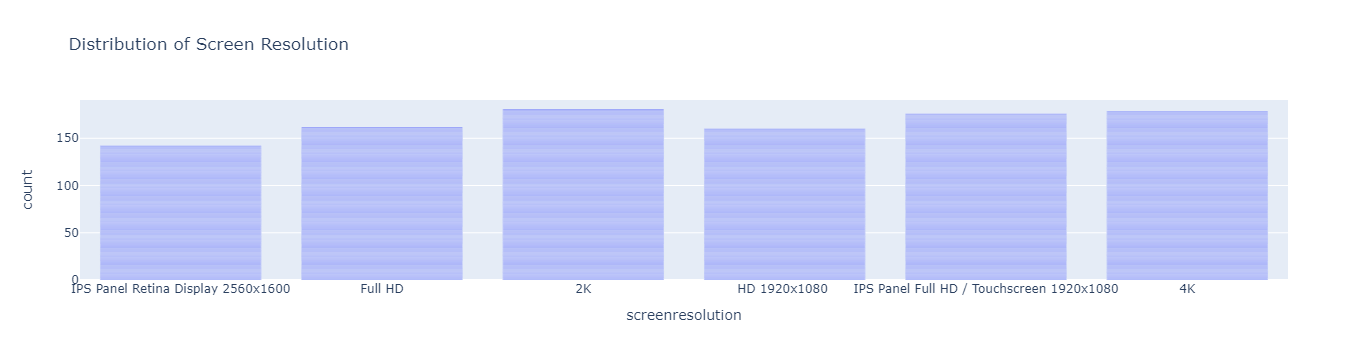

In [241]:
screenresolution_fig = px.bar(df,x=df.screenresolution,title='Distribution of Screen Resolution')
screenresolution_fig

In [242]:
df.cpu.value_counts()

cpu
Intel Xeon E3-1505M               114
Intel Atom x5-Z8550               111
Intel Core i5                     105
Intel Pentium Quad Core N4200     101
Intel Celeron Dual Core 3855U      98
Intel Core i7                      96
Intel Core i9                      95
AMD Ryzen 5                        94
AMD Ryzen 7                        94
AMD A9-Series 9420                 92
Name: count, dtype: int64

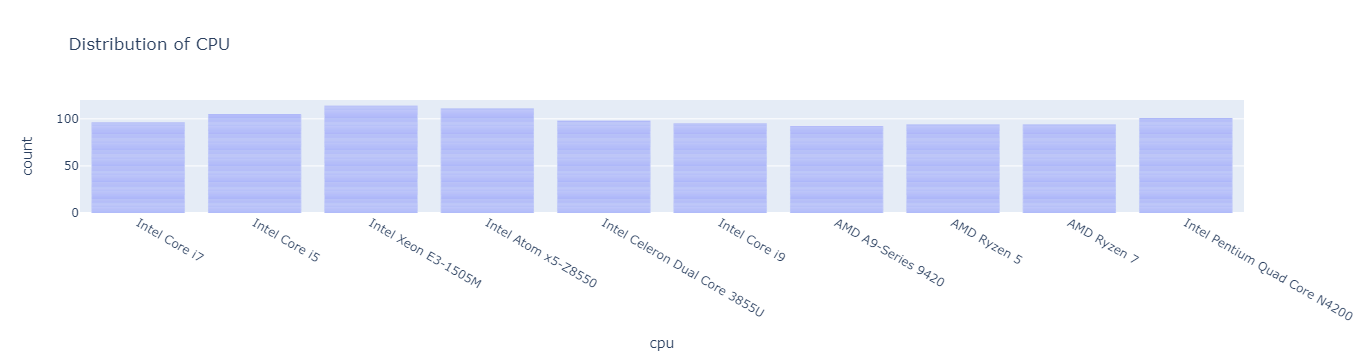

In [243]:
cpu_fig = px.bar(df,x=df.cpu,title='Distribution of CPU')
cpu_fig

In [244]:
df.ram.value_counts()

ram
8GB     270
12GB    247
4GB     243
16GB    240
Name: count, dtype: int64

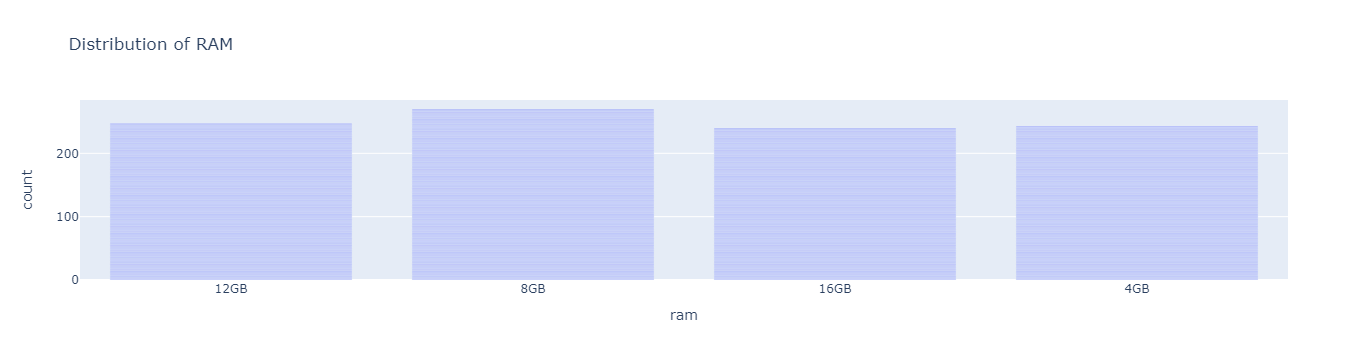

In [245]:
ram_fig = px.bar(df,x=df.ram,title='Distribution of RAM')
ram_fig

In [246]:
df.memory.value_counts()

memory
1TB HDD                105
2TB SATA SSD            63
1TB SSHD                61
4TB HDD                 60
512GB eMMC              59
128GB PCIe SSD          58
1TB NVMe SSD            55
256GB PCIe SSD          55
512GB NVMe SSD          54
512GB SSD               51
256GB SSD               50
2TB HDD                 50
1TB Fusion Drive        50
2TB NVMe SSD            49
256GB Flash Storage     46
6TB HDD                 45
256GB eMMC              45
128GB SSD               44
Name: count, dtype: int64

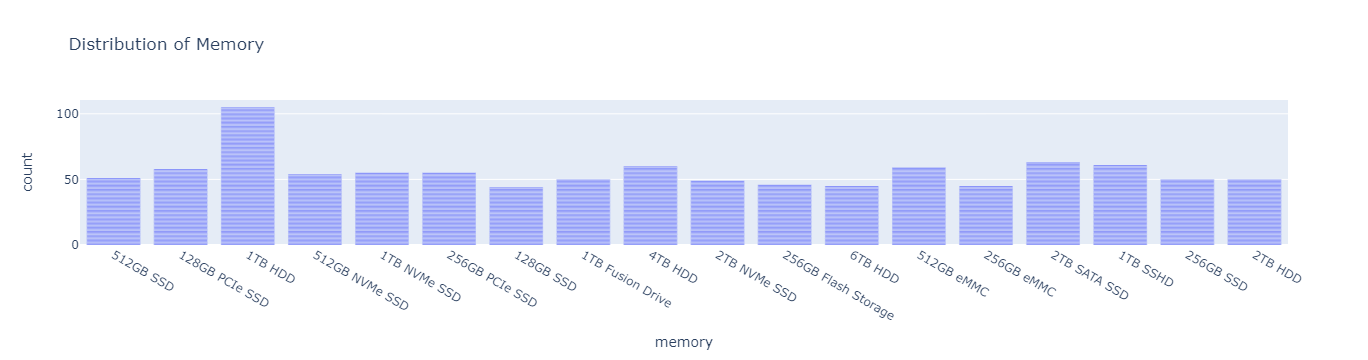

In [247]:
memory_fig = px.bar(df,x=df.memory,title='Distribution of Memory')
memory_fig

In [248]:
df.gpu.value_counts()

gpu
NVIDIA GeForce GTX 1650    348
AMD Radeon RX 5600M        339
Intel Iris Xe Graphics     313
Name: count, dtype: int64

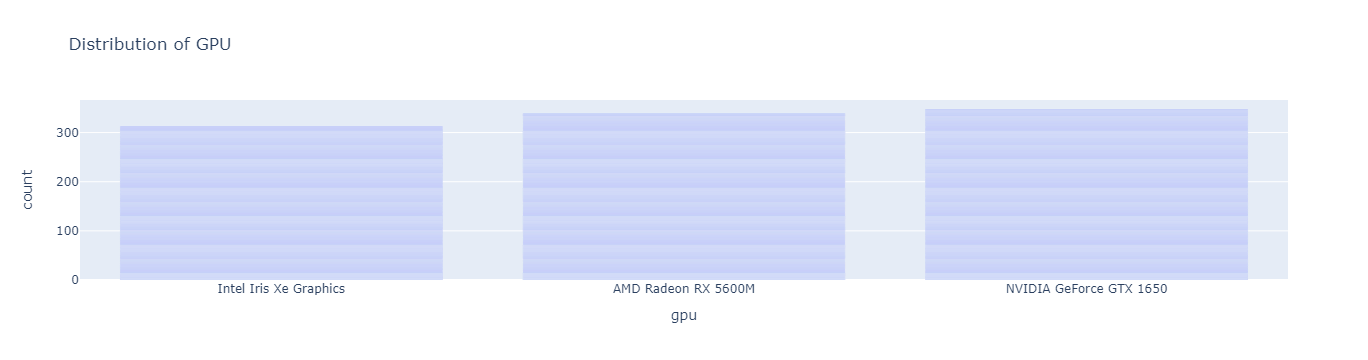

In [249]:
gpu_fig = px.bar(df,x=df.gpu,title='Distribution of GPU')
gpu_fig

In [250]:
df.opsys.value_counts()

opsys
No OS         224
macOS         219
Windows 10    194
Linux         187
Windows 11    176
Name: count, dtype: int64

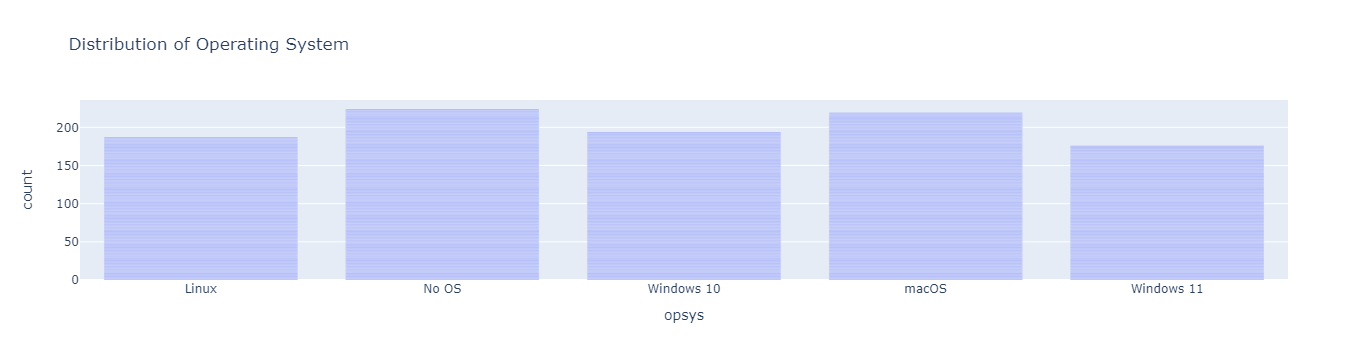

In [251]:
opsys_fig = px.bar(df,x=df.opsys,title='Distribution of Operating System')
opsys_fig

In [252]:
df.select_dtypes(include=['int','float']).corr()

,inches,weight,price
inches,1.000000,0.037982,-0.012535
weight,0.037982,1.000000,-0.024256
price,-0.012535,-0.024256,1.000000


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   companyname       1000 non-null   object 
 1   typeoflaptop      1000 non-null   object 
 2   inches            1000 non-null   float64
 3   screenresolution  1000 non-null   object 
 4   cpu               1000 non-null   object 
 5   ram               1000 non-null   object 
 6   memory            1000 non-null   object 
 7   gpu               1000 non-null   object 
 8   opsys             1000 non-null   object 
 9   weight            1000 non-null   float64
 10  price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [254]:
X = df.drop(['price'],axis=1)
y= df.price.astype(int)
y

0      35844
1      37019
2      33329
3      68631
4      33842
       ...  
995    40254
996    57272
997    48214
998    58926
999    63873
Name: price, Length: 1000, dtype: int32

In [255]:
cat_col = X.select_dtypes(include=['O'])
num_col = X.select_dtypes(include=['int','float'])

In [163]:
num_col

,inches,weight
0,17.040680,2.064834
1,16.542395,4.060656
2,17.295294,2.901689
3,11.526203,2.914843
4,12.649634,4.341995
...,...,...
995,16.242566,4.685053
996,17.450809,3.934182
997,13.761288,4.047468
998,11.038000,3.669825


In [256]:
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_1',StandardScaler(),num_col.columns),
        ('pipe_2',OneHotEncoder(handle_unknown='ignore',sparse_output=False),cat_col.columns)
    ],
    remainder='drop',
    n_jobs=-1
)

In [257]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [258]:
lr = LinearRegression()

In [259]:
lr_model = make_pipeline(preprocessor,lr)
lr_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipe_1', StandardScaler(),
                                                  Index(['inches', 'weight'], dtype='object')),
                                                 ('pipe_2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['companyname', 'typeoflaptop', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [260]:
y_predict = lr_model.predict(X)

In [261]:
mean_absolute_percentage_error(y,y_predict)

0.23115883753884123

In [262]:
mean_absolute_error(y,y_predict)

10981.558

In [263]:
df['lr_predict'] = y_predict

In [172]:
df[['price','lr_predict']]

,price,lr_predict
0,35844.099371,54874.0
1,37019.059051,45520.0
2,33329.360341,56162.0
3,68631.102486,48888.0
4,33842.479566,49156.0
...,...,...
995,40254.533272,54832.0
996,57272.697780,54778.0
997,48214.606894,49080.0
998,58926.553683,47658.0


In [264]:
rf = RandomForestRegressor()

In [265]:
rf_model = make_pipeline(preprocessor,rf)
rf_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipe_1', StandardScaler(),
                                                  Index(['inches', 'weight'], dtype='object')),
                                                 ('pipe_2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['companyname', 'typeoflaptop', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [266]:
rf_predict = rf_model.predict(X)

In [267]:
mean_absolute_percentage_error(y,rf_predict)

0.12124183010017756

In [268]:
mean_absolute_error(y,rf_predict)

5762.77865

In [269]:
from sklearn.tree import DecisionTreeRegressor

In [270]:
dt = DecisionTreeRegressor()

In [287]:
dt_model = make_pipeline(preprocessor,dt)
dt_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipe_1', StandardScaler(),
                                                  Index(['inches', 'weight'], dtype='object')),
                                                 ('pipe_2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['companyname', 'typeoflaptop', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [272]:
dt_predict = dt_model.predict(X)

In [273]:
mean_absolute_percentage_error(y,dt_predict)

0.08069260384870182

In [274]:
mean_absolute_error(y,dt_predict)

3983.091

In [275]:
from xgboost import XGBRegressor

In [276]:
xgb = XGBRegressor()

In [288]:
xgb_model = make_pipeline(preprocessor,xgb)
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipe_1', StandardScaler(),
                                                  Index(['inches', 'weight'], dtype='object')),
                                                 ('pipe_2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['companyname', 'typeoflaptop', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys'],
      dtype='object'))])),
                ('xgbregressor',
                 XGBRe...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [278]:
xgb_predict = xgb_model.predict(X)

In [279]:
mean_absolute_percentage_error(y,xgb_predict)

0.06924951756036182

In [280]:
mean_absolute_error(y,xgb_predict)

3395.89356640625

In [281]:
param = {
    'xgbregressor__n_estimators': [50, 60, 70, 80, 90, 100, 150, 200],
    'xgbregressor__learning_rate': np.arange(0.01, 0.31, 0.01),
    'xgbregressor__max_depth': np.arange(3, 11),
    'xgbregressor__subsample': np.arange(0.5, 1.01, 0.1),
    'xgbregressor__colsample_bytree': np.arange(0.5, 1.01, 0.1),
    'xgbregressor__gamma': np.arange(0, 1.01, 0.1),
    'xgbregressor__reg_alpha': np.arange(0, 1.01, 0.1),
    'xgbregressor__reg_lambda': np.arange(0, 1.01, 0.1)
}


In [289]:
xgb_random_search = RandomizedSearchCV(xgb_model,param,cv=5,n_jobs=-1)
xgb_random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                transformers=[('pipe_1',
                                                                               StandardScaler(),
                                                                               Index(['inches', 'weight'], dtype='object')),
                                                                              ('pipe_2',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               Index(['companyname', 'typeoflaptop', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys'],
      dtype='...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
                                        'xgbregressor__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'xgbregressor__n_estimators': [50, 60,
                                                                       70, 80,
                                                                       90, 100,
                                                                       150,
                                                                       200],
                                        'xgbregressor__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'xgbregressor__reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'xgbregressor__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [283]:
xgb_best = xgb_random_search.best_estimator_

In [284]:
xgb_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipe_1', StandardScaler(),
                                                  Index(['inches', 'weight'], dtype='object')),
                                                 ('pipe_2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['companyname', 'typeoflaptop', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys'],
      dtype='object'))])),
                ('xgbregressor',
                 XGBRe...
                              feature_types=None, gamma=0.8, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.08,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=60, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [285]:
xgb_predict = xgb_best.predict(X)

In [286]:
mean_absolute_percentage_error(y,xgb_predict)

0.19919461821211082